In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
data = pd.read_csv(r'C:\Users\ecws\Desktop\Udemy\Projects\Bank Loan classification/hmeq.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [7]:
data.describe(include ='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [8]:
missing = pd.DataFrame()
missing['Total missing'] = data.isnull().sum()
missing['%'] = data.isnull().sum()/len(data.index)*100
missing['%'] = missing['%'].round(1)
missing

,Total missing,%
BAD,0,0.0
LOAN,0,0.0
MORTDUE,518,8.7
VALUE,112,1.9
REASON,252,4.2
JOB,279,4.7
YOJ,515,8.6
DEROG,708,11.9
DELINQ,580,9.7
CLAGE,308,5.2


In [9]:
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

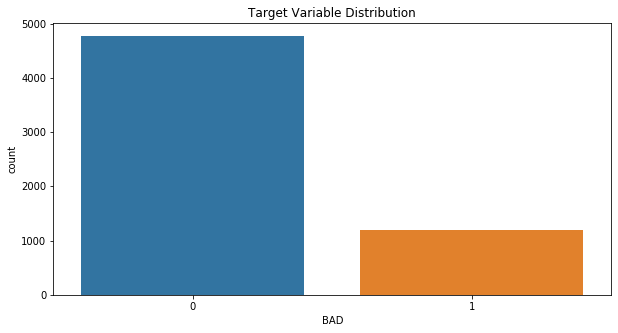

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data['BAD']).set_title("Target Variable Distribution")
plt.show()

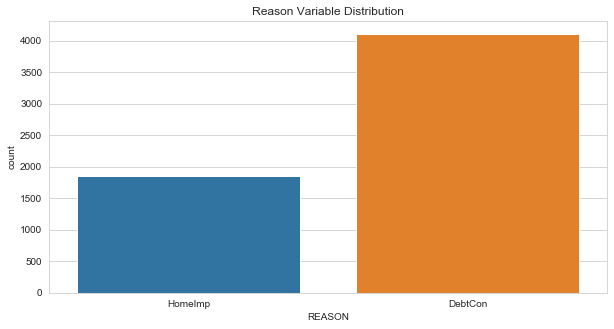

In [11]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(data['REASON']).set_title("Reason Variable Distribution")
plt.show()

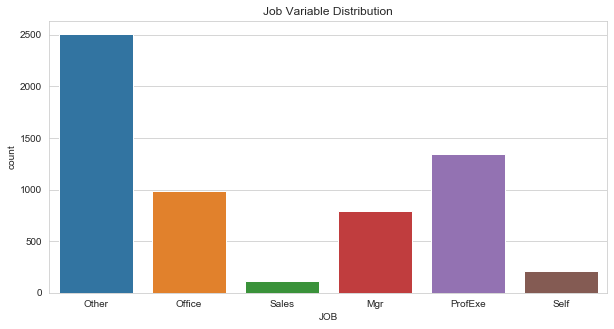

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.countplot(data['JOB']).set_title("Job Variable Distribution")
plt.show()

In [13]:
numerical_cols = [x for x in data.columns if data[x].dtype in ['int', 'float']]
num = data[numerical_cols]

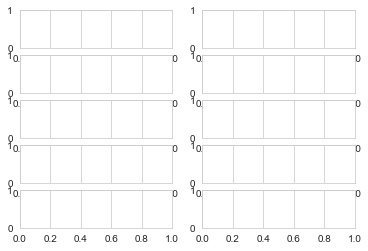

In [14]:

sns.set_style("whitegrid")

fig, axes = plt.subplots(ncols=2, nrows=5)

# for i , k in zip(numerical_cols[1:], range(1,len(numerical_cols)-1)):
#     plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(5,5,k)
#     sns.distplot(data[i], kde=False,bins=30, hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": 0.5}).set_title("{col_name} Variable Distribution".format(col_name = i))
    
# for i, ax in zip(numerical_cols[1:], axes.flat):
#     plt.figure(figsize=(10,10))
#     sns.distplot(data[i], kde=False, ax=ax, bins=30, hist_kws={"histtype": 'bar', "linewidth": 1, "alpha": 0.5}).set_title("{col_name} Variable Distribution".format(col_name = i))
    
plt.show()

In [20]:
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

In [21]:
y = data['BAD']
X = data.drop(['BAD'], axis=1)
X = pd.get_dummies(X)
smo = SMOTE(random_state=0)
X_resampled, y_resampled = smo.fit_resample(X, y)
sns.countplot(y_resampled)
plt.show()

NameError: name 'SMOTE' is not defined

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
smo = SMOTE(random_state=0)
X_resampled, y_resampled = smo.fit_resample(X, y)
sns.countplot(y_resampled)
plt.show()

NameError: name 'SMOTE' is not defined

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from collections import Counter
import itertools

In [ ]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=0)))
models.append(('Bagging', BaggingClassifier(random_state=0)))
models.append(('Random Forest', RandomForestClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=0)))
models.append(('GBM', GradientBoostingClassifier(random_state=0)))
models.append(('XGB', XGBClassifier(random_state=0)))
results_v = []
names = []
score = []
skf = StratifiedKFold(n_splits=5)
for (name, model) in models:
    param_grid = {}
    my_model = GridSearchCV(model,param_grid,cv=skf)
    my_model.fit(X_train, y_train)
    predictions_v = my_model.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, predictions_v) 
    results_v.append(accuracy_valid)
    names.append(name)
    f_dict = {'model': name,'accuracy_valid': accuracy_valid}

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(my_model, X_valid, y_valid, values_format = 'd', cmap=plt.cm.Blues, xticks_rotation = 'horizontal').ax_.set_title(str(name)+' Model Confusion Matrix')
    plt.grid(False)
    score.append(f_dict)

plt.show()   

score = pd.DataFrame(score, columns = ['model', 'accuracy_valid'])

In [ ]:
score

In [ ]:
score